# Salma Y. Roriguez

### 10/16/2021

# Exploratory Analysis (A Naive Approach)

## Categories of Bonds

| $\text{Type}$     | $\text{Maturity}$                        |
| ----------------- | ---------------------------------------- |
| $\text{Bill (b)}$ | $1\text{m} \leq \text{T} \leq 1\text{Y}$ |
| $\text{Note (N)}$ | $1\text{Y} \lt \text{T} \lt 10\text{Y}$  |
| $\text{Bond (B)}$ | $\quad\quad\ \text{T} \geq 10\text{Y}$   |

## What is a Constant Maturity Treasury?

According to [Investopedia](https://www.investopedia.com/terms/c/constantmaturity.asp), Constant Maturity is an adjustment for equivalent maturity, used by the Federal Reserve Board to compute an index based on the average yield of various Treasury securities maturing at different periods.

One would use constant maturity yields as reference for pricing all kinds of depts or fixed income securities, fixed income securities being by far the largest type of security in U.S. Securities markets.

## Nominal Yield Curve Rates vs. Real Yield Curve Rates

According to the Board of Governors of the Federal Reserve System, a [nominal Treasury security](https://www.federalreserve.gov/data/nominal-yield-curve.htm) is an issuance that specifies principal and interest as fixed dollar amounts to the holder. Since Treasury securities are backed by the full faith and credit of the U.S. government, the returns investors can earn on them are often used as a “risk-free” benchmark in finance research and investment practice. These securities are a promise to repay the principal (with interest if a note or a bond) to the holder (can be a public or private entity). Therefore, the real yield curve rate would be adjusted for inflation of interest rates.

The real yield determines the cashflow an investor in secondary markets can obtain by purchasing $\text{TIPS}$, which are Inflation Protected Securities offered by the U.S. Treasury department and other securities that offer similar inflation protection to investors.

## Statement of Purpose

The purpose of this exploratory analysis is to determine inflation in U.S. securities. Stability testing includes anomaly test, a test for stationarity and normality test. US Bonds, Notes and Bills are used for vanilla testing. An Inflation Simulation is ran for any security where inflation is detected to be outside of the confidence region.

In [3]:
] add https://github.com/JuliaIO/EzXML.jl.git

    Cloning git-repo `https://github.com/JuliaIO/EzXML.jl.git`


Fetching: [========================================>]  100.0 %3 % [=========>                               ]  21.0 %=============>                           ]  31.0 % [=================>                       ]  40.3 %>              ]  63.6 %Fetching: [===========================>             ]  66.5 %>          ]  74.6 %Fetching: [===================================>     ]  85.9 %

   Updating git-repo `https://github.com/JuliaIO/EzXML.jl.git`


Fetching: [========================================>]  100.0 %.0 %]  28.8 %=================>                       ]  41.4 %                 ]  56.5 %           ]  71.6 %86.0 %

  Resolving package versions...
Updating `C:\Users\Owner\.julia\environments\v1.5\Project.toml`
  [8f5d6c58] + EzXML v1.1.0 `https://github.com/JuliaIO/EzXML.jl.git#master`
Updating `C:\Users\Owner\.julia\environments\v1.5\Manifest.toml`
  [8f5d6c58] + EzXML v1.1.0 `https://github.com/JuliaIO/EzXML.jl.git#master`


## Importing Libraries

In [1]:
include("./Treas.jl");

In [2]:
using DataFrames, Distributions, HypothesisTests
using LinearAlgebra, Plots, Random
using Serialization, StatsBase, StatsPlots

## Loading and Visualizing Datasets

I start by visualizing two types of CMT rates: the **nominal** and **real** CMT yield curve rates for fixed income securities and debts maturing at different time periods. Inflation in the yield of these securities causes the market, overall, to be leveraged above the real value of promises made to the holder of any respective security.

### Nominal CMT Yield Curve Rates

In [3]:
tux = DailyTreasuryYieldCurveRateData("2019", true)

,Id,dt,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64
1,7258,2019-01-02T00:00:00,2.4,2.4,2.42,2.51,2.6
2,7259,2019-01-03T00:00:00,2.42,2.42,2.41,2.47,2.5
3,7260,2019-01-04T00:00:00,2.4,2.42,2.42,2.51,2.57
4,7261,2019-01-07T00:00:00,2.42,2.42,2.45,2.54,2.58
5,7262,2019-01-08T00:00:00,2.4,2.42,2.46,2.54,2.6
6,7263,2019-01-09T00:00:00,2.4,2.42,2.45,2.52,2.59
7,7264,2019-01-10T00:00:00,2.42,2.42,2.43,2.51,2.59
8,7265,2019-01-11T00:00:00,2.41,2.43,2.43,2.5,2.58
9,7266,2019-01-14T00:00:00,2.42,2.43,2.45,2.52,2.57


### Real CMT Yield Curve Rates

In [4]:
tuy = DailyTreasuryYieldCurveRateData("2019", false)

,Id,dt,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64
1,4004,2019-01-02T00:00:00,NaN,NaN,NaN,NaN,NaN
2,4005,2019-01-03T00:00:00,NaN,NaN,NaN,NaN,NaN
3,4006,2019-01-04T00:00:00,NaN,NaN,NaN,NaN,NaN
4,4007,2019-01-07T00:00:00,NaN,NaN,NaN,NaN,NaN
5,4008,2019-01-08T00:00:00,NaN,NaN,NaN,NaN,NaN
6,4009,2019-01-09T00:00:00,NaN,NaN,NaN,NaN,NaN
7,4010,2019-01-10T00:00:00,NaN,NaN,NaN,NaN,NaN
8,4011,2019-01-11T00:00:00,NaN,NaN,NaN,NaN,NaN
9,4012,2019-01-14T00:00:00,NaN,NaN,NaN,NaN,NaN


I stumbled upon some NaNs. Usually when this happens is that there is no public data for specific maturities.
I will create a boolean matrix to check for empty cells.

In [5]:
B = [isnan(tuy[i, j]) ? Bool(1) : Bool(0) for i in 1:size(tuy)[1], j in 3:size(tuy)[2]]

250×13 Array{Bool,2}:
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 ⋮              ⋮              ⋮     
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  

Checking for valid entries in all $250$ trading days for $2019$, using the expression

$$
    \sum_{j = 1}^{n} \prod_{i = 1}^{m} I_{i \times j}
$$

where `prod` is equivalent to logical AND, `sum` is equivalent to logical OR, $T$ is the number of trading days in the year in question ($\sim$ 252 on average), $n$  is the number of columns and $I_{i \times j}$ is the empty cell indicator, piecewise-defined as

$$
    I_{i \times j} = \cases{ 0 \quad \text{if not empty} \\ 1 \quad \text{if empty} }
$$

Then, I have

In [6]:
sum(prod(B[:, j]) for j in 1:13)

8

It seems I have data from columns $10$ to $14$ of the `tuy` matrix, because the sum is $8$ (meaning that $\frac{8}{13}$ columns are empty). It can also be visually checked that columns $10$ to $14$ are nonempty. To double check this conjecture, I find that

In [7]:
sum(prod(B[:, j]) for j in 1:7) + 1

8

which, indeed, confirms that there is data in columns $10$ to $14$. Great! Now, here's what the data looks like

In [8]:
tuy[:, 10:14]

,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
,Float64,Float64,Float64,Float64,Float64
1,0.997611,0.979614,0.963528,1.07481,1.18574
2,0.878698,0.878005,0.877105,1.00684,1.1442
3,0.910271,0.910336,0.914195,1.04987,1.17145
4,0.91701,0.91576,0.924594,1.05574,1.17798
5,0.915523,0.911471,0.912635,1.0311,1.14943
6,0.892695,0.895216,0.910237,1.05256,1.1611
7,0.907342,0.91036,0.92799,1.0818,1.20026
8,0.856883,0.861291,0.880316,1.04722,1.17546
9,0.88502,0.8849,0.900951,1.06906,1.19771


### Saving the Data Sets for Later Use

It may be worthwhile saving the original datasets for later use.

In [9]:
serialize("saved1", tux)
serialize("saved2", tuy)

### Cummulative Data Representation

At first I thought a cummulative sum would not be very useful for and exploratory analysis of coupon rates, but it is something that is useful for tracking changes in yield curve rates. For instance, if the slope is too steep, then there is a substantial increase in yield curve rates, and if it is too narrow (the curve becomes a plateau) then there is low increase in the yield (no inflation). Below is the cummulative analysis, starting with

In [10]:
function fix_array_expression(arr)
    tmp = Array{Any}(undef, (10, 5))
    I = 1:5
    for C in I
        tmp[:, C] =
            [ sum(arr[:, 1][C][001:025]),
              sum(arr[:, 1][C][026:050]),
              sum(arr[:, 1][C][051:075]),
              sum(arr[:, 1][C][076:100]),
              sum(arr[:, 1][C][101:125]),
              sum(arr[:, 1][C][126:150]),
              sum(arr[:, 1][C][151:175]),
              sum(arr[:, 1][C][176:200]),
              sum(arr[:, 1][C][201:225]),
              sum(arr[:, 1][C][226:250])
            ]
    end
    return arr = tmp
end

fix_array_expression (generic function with 1 method)

to partition the cummulative yield increases by ticks of `25` (this will help arrange the cummulative bar plots into `10` bins of `25` each). Then I have that

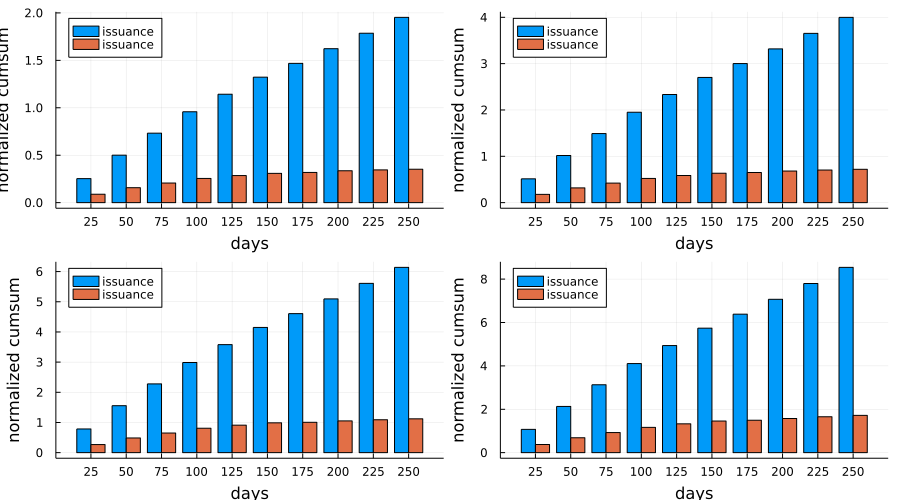

In [11]:
mycumsum1 = cumsum(tux[:, C] for C in 10:14) ./ 250;
mycumsum2 = cumsum(tuy[:, C] for C in 10:14) ./ 250;

mycumsum1 = fix_array_expression(mycumsum1)
mycumsum2 = fix_array_expression(mycumsum2)

p = [mycumsum1[:, C] for C in 1:5]; p = cumsum.(p)
q = [mycumsum2[:, C] for C in 1:5]; q = cumsum.(q)

p = [groupedbar([p[R] q[R]], label="issuance") for R in 1:5];

ticklabel = string.([I for I in 25:25:250])

gr()

plot!(p[1], p[2], p[3], p[4], bar_position = :dodge, 
                              layout = (2, 2), legend = :topleft, size = (900, 500), xticks = (1:10, ticklabel))
plot!(xlab = "days", ylab = "normalized cumsum")

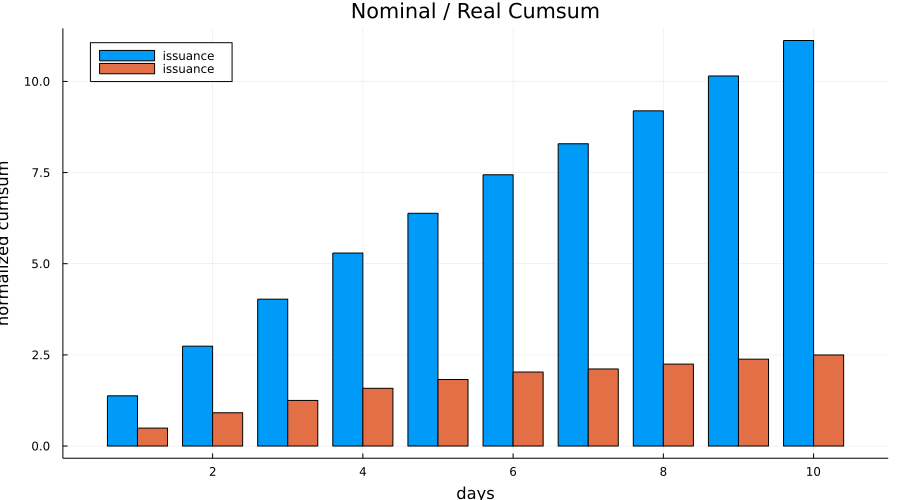

In [12]:
plot(p[5], layout = (1, 1), legend = :topleft, size = (900, 500), title = "Nominal / Real Cumsum", xlab = "days", ylab = "normalized cumsum")

where issuances in <span style="color:blue">blue</span> are nominal rates and issuances in <span style="color:red">red</span> are real rates.

### Plotting Nominal CMT Yield Curve Rates for UpTo One (1) Year and then $Y \in [5,\ 7,\ 10,\ 20,\ 30]$ Years

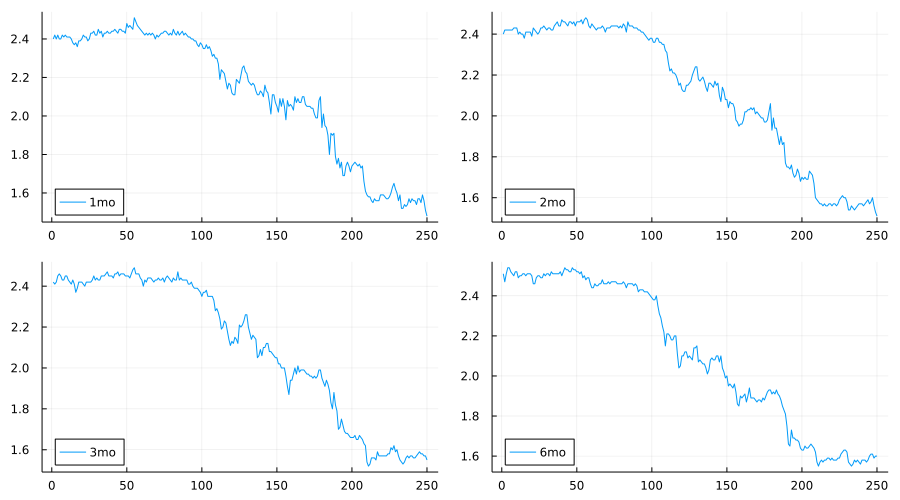

In [13]:
mtux = Matrix(tux);
lb = ["1mo", "2mo", "3mo", "6mo", "1yr"]
p = [plot(mtux[:, C], 
    label = lb[C-2], layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 3:7];
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

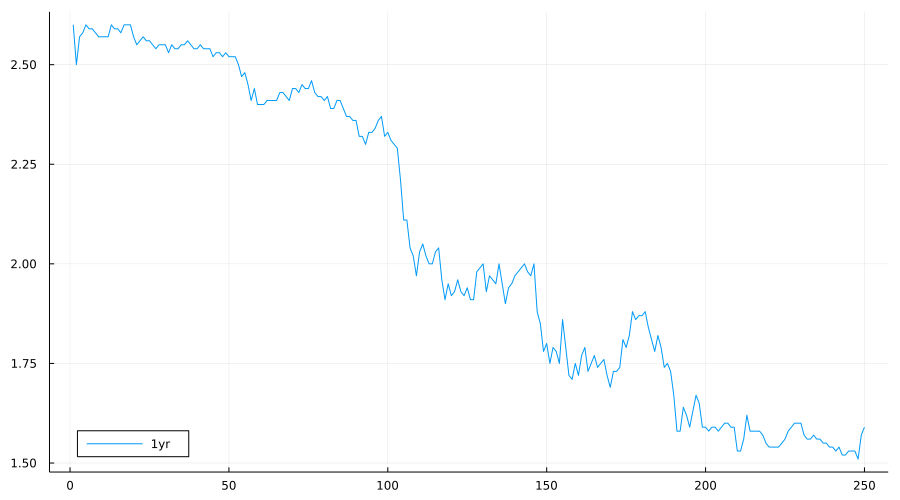

In [14]:
plot(p[5])

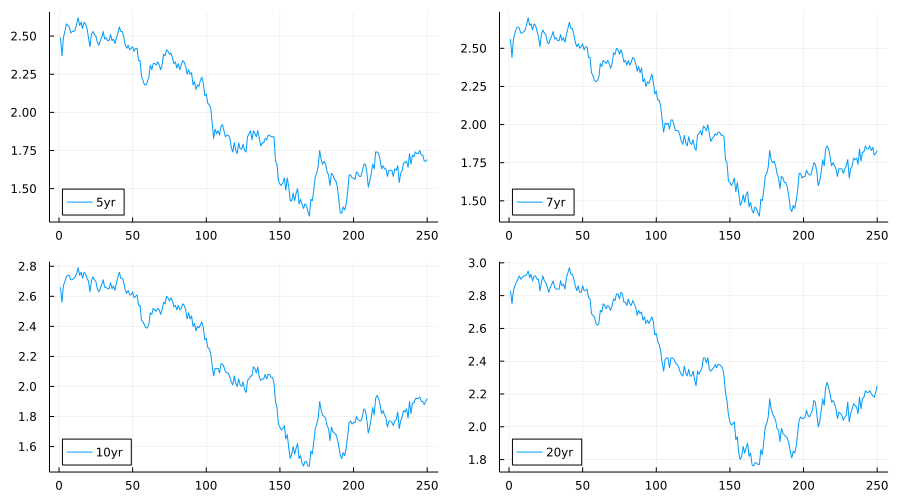

In [15]:
lb = ["5yr", "7yr", "10yr", "20yr", "30yr"]
p = [plot(mtux[:, C],
    label = lb[C-9],
    layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 10:14];
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

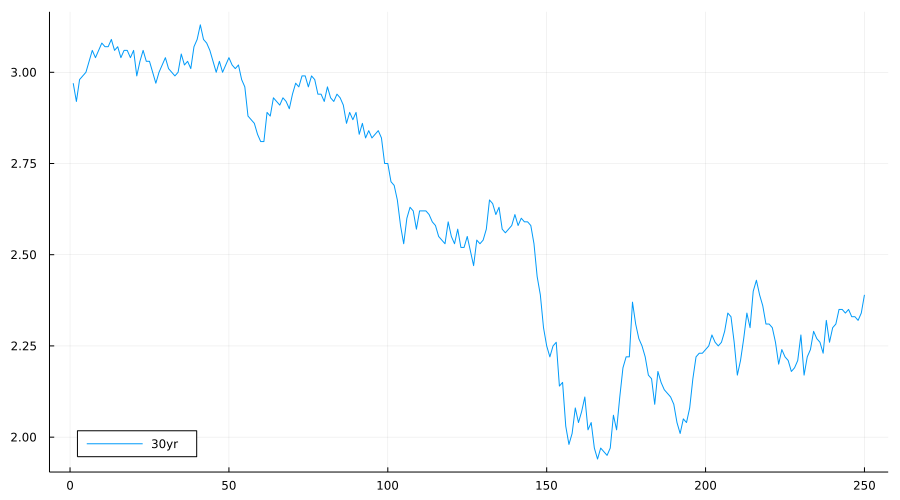

In [16]:
plot(p[5])

There seems to be correlation in the data, with a wider variance in interest rates for the `5, 7, 10, 20 and 30` year bonds. Correlation across maturities will be analyzed in `Treas TS Analysis II` with $\text{VARIMA}$ models.

### Plotting Real Interest Rates

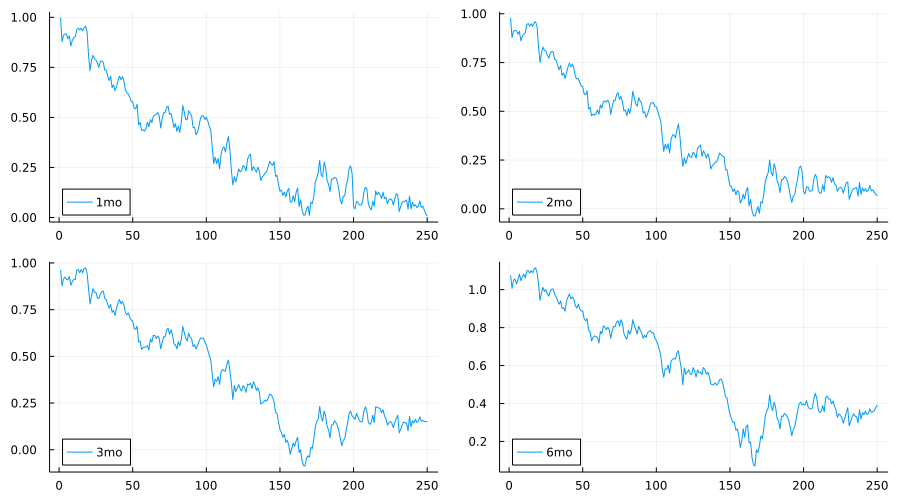

In [17]:
lb = ["1mo", "2mo", "3mo", "6mo", "1yr"]
mtuy = Matrix(tuy);
p = [plot(mtuy[:, C], 
    label = lb[C-9], 
    layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 10:14]
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

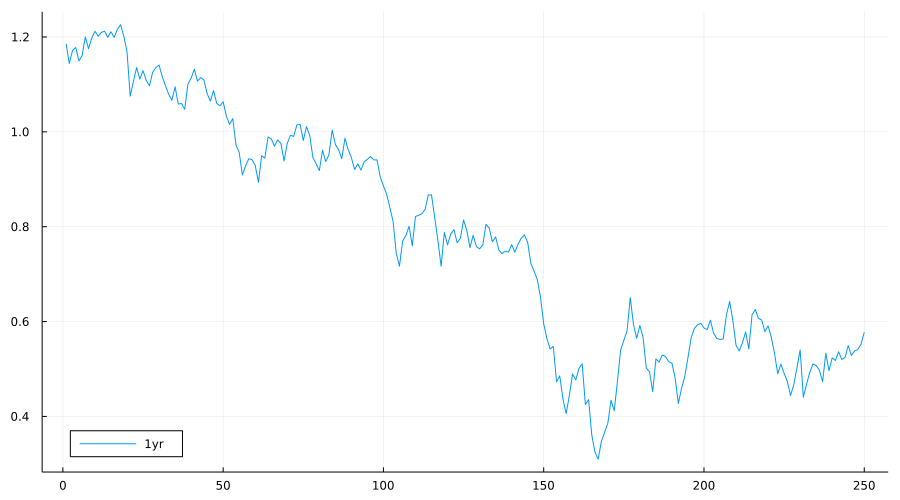

In [18]:
plot(p[5])

The raw (non-transformed) data exhibit similar trends for both the real and nominal rates.

### Plotting Nominal$-$Real Yield Curve Rates for 5, 7, 10, 20, and 30 Year CMT to Determine Inflation Rates.

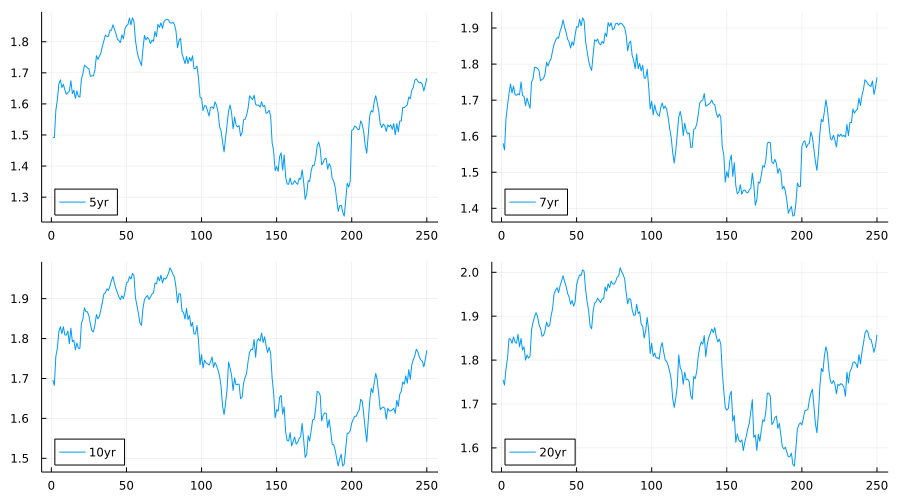

In [19]:
minf = mtux[:, 10:14] - mtuy[:, 10:14]
lb = ["5yr", "7yr", "10yr", "20yr", "30yr"]
p = [plot(minf[:, C], 
    label = lb[C], 
    layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 1:5]
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

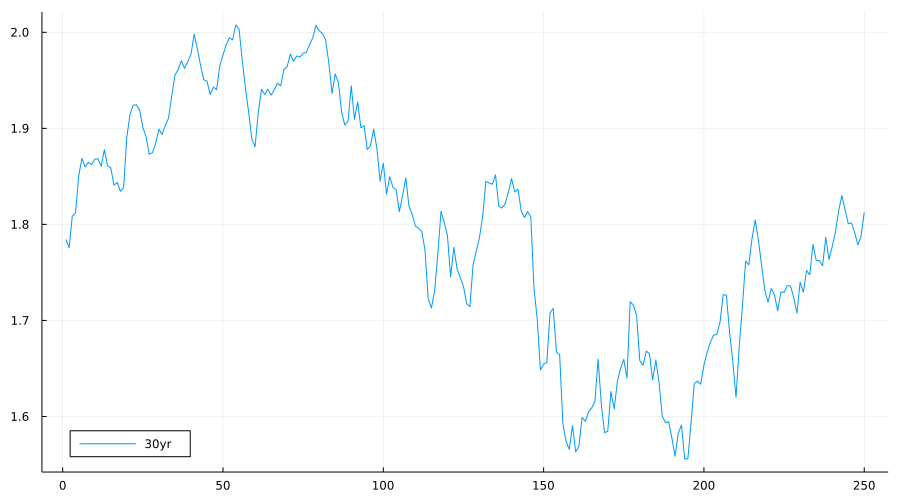

In [20]:
plot(p[5])

### Boxplot for Inflation Rates

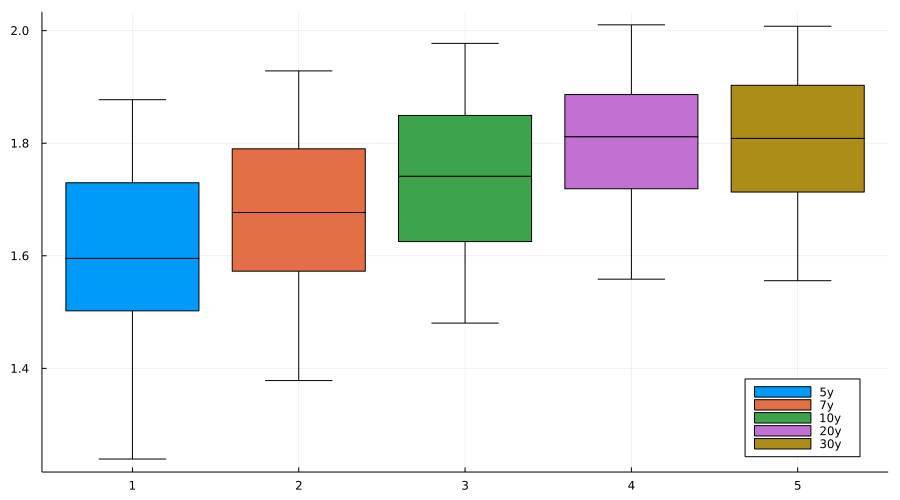

In [21]:
lb = ["5y", "7y", "10y", "20y", "30y"]
function h3(M, A, B)
    b = boxplot(M[:, A], label = lb[1], layout = (1, 1), legend = :bottomright, size = (900, 500))
    for C in A+1:B
        boxplot!(M[:, C], label = lb[C])
    end
    return b
end
h3(minf, 1, 5)

## Distribution Determination (Density Testing and PDF Kernel Selection)

To determine what the density of the the data between columns `10:14` (representing rates for the 5, 7, 10, 20 and 30 Year Treasury securities) is going to be, I will run a series of tests to determine an adequate probability density function (PDF).

### Nominal ADF Test for Stationarity (Augmented Dickey-Fuller Test)

The nominal CMT yield curve rates are usually not adjusted for inflation. The aim is to determine **inflation**. Stabilized inflation rates are unlikely to take place in a **Market Economy**, where there are real laws of supply and demand and equilibrium doesn't just happen "magically".

It is still worthwhile to determine any stationarity in the stochastic process corresponding to each CMT yield curve rate series, or remove nonstationarity for forecasting purposes.

In [22]:
[ADFTest(tux[:, I], Symbol("constant"), 5) for I in 10:14]

5-element Array{ADFTest,1}:
 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0110101

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5422

Details:
    sample size in regression:          244
    number of lags:                     5
    ADF statistic:                      -1.48235
    Critical values at 1%, 5%, and 10%: [-3.45678 -2.87317 -2.57297]

 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0109593

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5460

Details:
    sample size in regression:          2

In the ADF test for nominal interest rates **I fail to reject $H_0$** (that the stochastic process is stationary) **with confidence levels between 54.22% and 61.38%**. I will produce a comparable test for the real interest rates of Fiscal Year 2019.

### Real ADF Test for Stationarity (Augmented Dickey-Fuller Test)

The real interest rate is always adjusted for inflation in market rates. I then have

In [23]:
[ADFTest(tuy[:, I], Symbol("constant"), 5) for I in 10:14]

5-element Array{ADFTest,1}:
 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0159721

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4121

Details:
    sample size in regression:          244
    number of lags:                     5
    ADF statistic:                      -1.73709
    Critical values at 1%, 5%, and 10%: [-3.45678 -2.87317 -2.57297]

 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0138636

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4352

Details:
    sample size in regression:          2

In the case of real yield curve rates, **I reject the $H_0$ hypothesis with confidence levels between 41.21% and 56.69%**. Since there is rejection for both real and nominal, I will require a **first order differencing transformation** for these two types of rates, due to nonstationarity. I need to take the transformation for inflation rates, since the aim of my study is to determine the financial leverage of securities on the average.

In [24]:
X = diff(Matrix(minf), dims = 1)

249×5 Array{Float64,2}:
 -0.001087  -0.018391  -0.013577  -0.012029  -0.008463
  0.088427   0.087669   0.07291    0.036966   0.032744
  0.033261   0.034576   0.019601   0.024136   0.003473
  0.051487   0.034289   0.041959   0.044634   0.038554
  0.012828   0.026255   0.012398  -0.001462   0.018327
 -0.024647  -0.025144  -0.017753  -0.009233  -0.009161
  0.010459   0.019069   0.017674   0.014576   0.004799
 -0.018137  -0.023609  -0.020635  -0.011837  -0.002242
 -0.01395   -0.001635  -0.000344  -0.002498   0.005526
  0.005696   0.004173   0.009827   0.020238   0.000504
  0.005009  -0.002923  -0.031591  -0.028263  -0.007905
  0.032809   0.035762   0.038909   0.018592   0.017296
 -0.041506  -0.037553  -0.033547  -0.025984  -0.016865
  ⋮                                          
 -0.005558  -0.020261  -0.024464  -0.02077   -0.023178
  0.027524   0.028031   0.036667   0.026895   0.013084
  0.009191   0.0163     0.012694   0.01969    0.015446
  0.02305    0.026762   0.009887   0.022647   0.02

### Running ADF Test Again to Determine Stationarity

In [25]:
[ADFTest(X[:, C], Symbol("constant"), 5) for C in 1:5]

5-element Array{ADFTest,1}:
 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.957566

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-8

Details:
    sample size in regression:          243
    number of lags:                     5
    ADF statistic:                      -6.84931
    Critical values at 1%, 5%, and 10%: [-3.45689 -2.87322 -2.57299]

 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.05489

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-9

Details:
    sample size in regression:          243
    number of lags

With p-values sufficiently small, **all ADF tests pass, with 95% confidence**.

### Test for Normality (Jarque-Bera Test)

I want to determine if the transformed data set has a normal distribution. The Jarque-Bera Lagrange Multiplier Test attempts to determine the normality of the data set, by testing higher order moments, such as **skewness** and **kurtosis**.

In [26]:
[JarqueBeraTest(X[:, C]) for C in 1:5]

5-element Array{JarqueBeraTest,1}:
 Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.6437504506098445 and 6.935062012572208"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-38

Details:
    number of observations:         249
    JB statistic:                   177.852

 Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.14703748500983183 and 4.022227587138387"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0028

Details:
    number of observations:         249
    JB statistic:                   11.7386

 Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest: 

The J-B Normality Test **passes with an adequate confidence level for one Constant Maturity Treasury Coupon Security**. The Jarque-Bera Test passes for the 10-Year Bond, it having more central tendency (hence being more predictable) in nominal inflation, since I fail to reject $H_0$ with 56.60% confidence.

### Probability Distribution Function (PDF) for Inflation Rate First-Differences

**For securities that pass the J-B test**, one "passes" if I allow $\alpha \geq 2.78\%$, i.e., the $30$ Year T-bond, and the $10$ Year T-Bond. I begin by computing deviation scores, of a covariance matrix for the raw scores. I previously included all the bonds in the multivariate normal distribution, but this would be erronous (some of the limitation of a top-down approach to modeling); since some of the series are not normally distributed, an `MvNormal` model would be erroneous.

In [27]:
n = size(minf)[1]
Y = minf[:, [3, 5]]
y = Y - ones(n)*ones(n)'Y*(1/n);

Next, I have to get **x'x**, the k x k deviation sums of squares and cross product matrix for x, and finally, dividing each term in the deviation sums of squares and cross product matrix by $n$, to create the variance-covariance matrix

In [28]:
V = y'y * (1/n)

2×2 Array{Float64,2}:
 0.0177314  0.0162168
 0.0162168  0.0152068

then taking the mean

In [29]:
M = [mean(Y[:, I]) for I in 1:size(Y)[2]]

2-element Array{Float64,1}:
 1.7403989999999998
 1.800426404

I have a distribution

In [31]:
D = MvNormal(M, V)

FullNormal(
dim: 2
μ: [1.7403989999999998, 1.800426404]
Σ: [0.017731433204639997 0.016216809248295994; 0.016216809248295994 0.015206830099200791]
)


## Inflation Simulation

As we can only run simulation for up to a lag of two (2), as per the dimensionality of the covariance matrix, the **lookahead estimator** can only predict outcomes for **upto two steps ahead**.

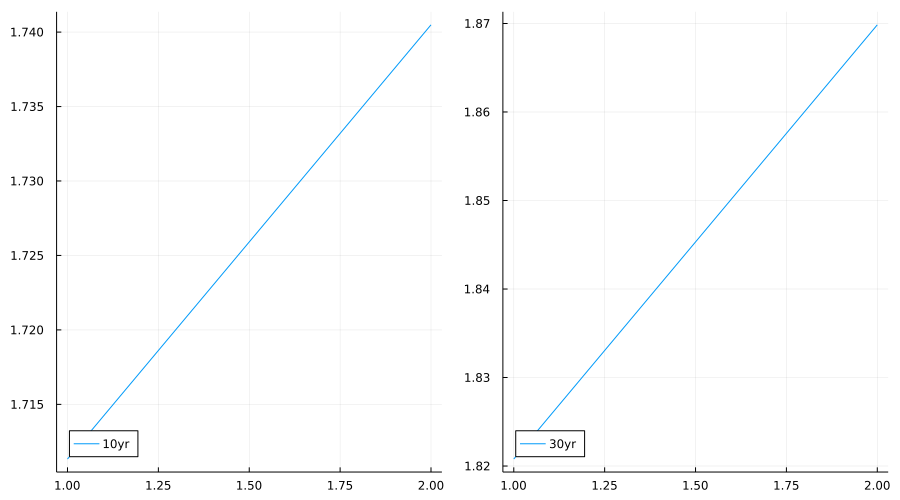

In [32]:
lb = ["10yr", "30yr"]

Random.seed!(12); S = [rand(D) for I in 1:2]
p = [plot(S[C],
    labels = lb[C], 
    layout = (1, 1), legend = :bottomleft, size = (900, 500)
) for C in 1:2]; plot(p[1], p[2], layout = (1, 2))

## Conclusions

This is not the result I wanted to arrive at, given that I was only able to predict future values for two random draws of the multivariate normal variable, with one being normal only at the $2.78\%$ confidence level, which would not work for a $5\%$ test. All in all, the most predictable US Treasury security was the $10$ years at $\alpha = 56.60\%$.

Although no price anomalies were detected for any of the securities, as per the boxplots, further analysis will be needed to come up with a better and more precise time series model, although this would suffice, given that I am only conducting an exploratory analysis. A good question to ask is, "Would a lag of $5$ be sufficient? Is it necessary or do I need to try with a lower lag?"

The Inflation Rates for Fiscal Year 2019 and Inflation Simulation indicate that there is some inflation in the US Securities Market. In the following notebook, titled: `Treas TS Analysis I`, I will be investigating ARIMA models for $T \in [5, 7, 10, 20, 30]$, as I go into a more **data-driven** modeling approach.